# Pymaceuticals Inc.

Alec Druggan - Module 5: MatPlotLib - Analysis for Pymaceuticals Inc.

### Analysis

Looking at all the applied drug regimens, we aw that when we pulled both the regimen counts and the summary statistics, that we could look further into the Capomulin regimen (view charts: Total Rows per Drug Regimen, information printed as summary statistics of the four regimens, and the Tumor Volume Distribution by Drug Regimen boxplot). This tells us that Capomulin and Ramicane were both significantly better treatments than Infubinol and Ceftamin. 

From there, we could sample a mouse by it's specific MouseID to see the tumor volume decrease with time points (view chart: Tumor Volume in mouse vs. Time Point for MouseID = s185) and see the decrease in tumor volume (in mm3) under the Capomulin treatment. To understand the signficance of the volume, we also plotted the tumor volume in mm3 against the weight of the mouse in grams, which showed a correlation coefficient of 0.834... between these two statistics. This is an incredibly strong positive correlation, and shows us that tumor volume in the mice undergoing the capomulin regimen is directly proportional between the two, and we can measure the weight of the mouse and size of the tumor and expect them to increase in a linearly correlative manner.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(combined_df["Mouse ID"].unique())
print(f"Number of mice: {mouse_count}")

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateMouseID = duplicates["Mouse ID"].unique()
print(duplicates)
print(f"The duplicate mouse's ID is: {duplicateMouseID}")

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  
The duplicate mouse's ID is: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get this by using the MouseID which is stored in the duplicateMouseID variable
# Write code:

duplicate_data = combined_df.loc[combined_df["Mouse ID"] == 'g989']
print(duplicate_data)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID'], keep='first')
clean_df = combined_df.reset_index(drop=True)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# Should this still be the same amount of MouseIDs since we kept the first occurence in the drop_duplicates() method by passing argument 'keep = 'first''?
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# To get these pull them from our clean_df dataframe


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


grouped_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculate summary statistics
summary_statistics_stat_methods = pd.DataFrame({
    "Mean": grouped_data.mean(),
    "Median": grouped_data.median(),
    "Variance": grouped_data.var(),
    "Std Dev": grouped_data.std(),
    "SEM": grouped_data.sem()
})

summary_statistics_stat_methods

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

#rename columns
summary_statistics.columns = ["Average", "Median", "Variance", "St. Deviation", "SEM"]

#display summary statistics
summary_statistics

,Average,Median,Variance,St. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

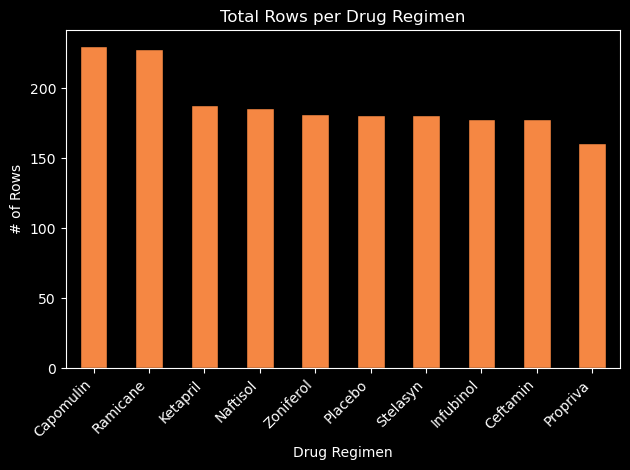

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Get the count of rows for each drug regimen
drug_regimen_counts = clean_df["Drug Regimen"].value_counts()

# Plot the bar chart using pandas plot function
drug_regimen_counts.plot(kind="bar", color="#f58743", edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Rows")
plt.title("Total Rows per Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

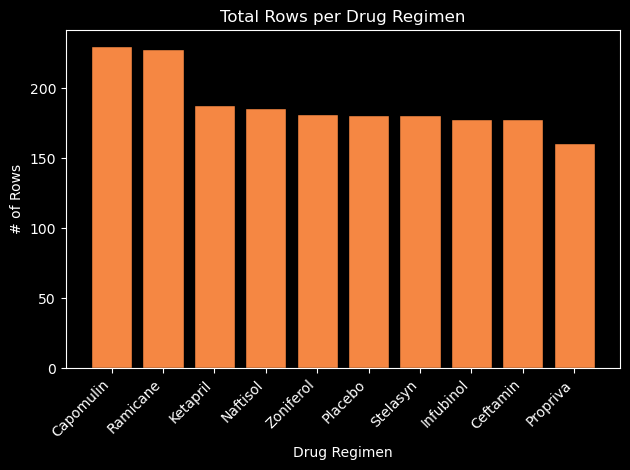

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get the count of rows for each drug regimen
drug_regimen_counts = clean_df["Drug Regimen"].value_counts()

# Plot the bar chart using Matplotlib's pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="#f58743", edgecolor="k")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Rows")
plt.title("Total Rows per Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

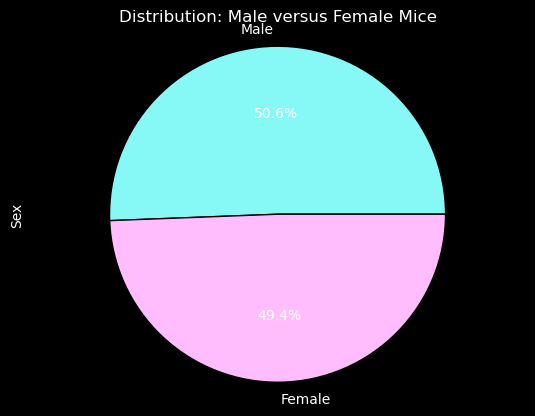

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the counts of males and females
sex_counts = clean_df["Sex"].value_counts()

# Plot the pie chart using pandas
sex_counts.plot(kind="pie", labels=sex_counts.index, autopct="%1.1f%%", colors=["#86f9f7", "#Ffbdfd"],
                wedgeprops={"edgecolor": "k"})

# Set the title and y label
plt.title("Distribution: Male versus Female Mice")

# This will make the pie chart circular (cements aspect ratio)
plt.axis("equal")

# Show the plot
plt.show()

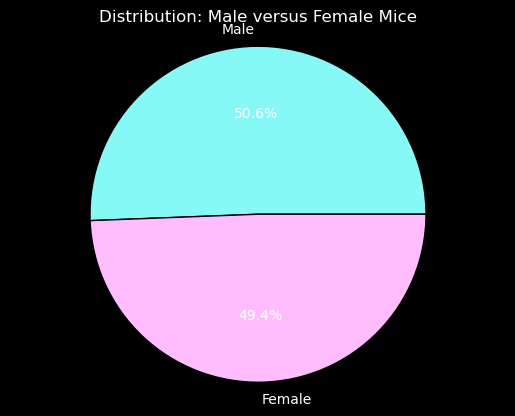

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the counts of males and females
sex_counts = clean_df["Sex"].value_counts()

# Plot the pie chart using matplotlib
plt.figure()

# Colors for each category
colors = ["#86f9f7", "#Ffbdfd"]

# Create the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", colors=colors, wedgeprops={"edgecolor": "k"})
plt.title("Distribution: Male versus Female Mice")

# This will make the pie chart circular (cements aspect ratio)
plt.axis("equal")

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# List of the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the DataFrame to include only the specified treatment regimens
filtered_df = clean_df[clean_df["Drug Regimen"].isin(treatment_regimens)]

# Get the greatest timepoint for each mouse
max_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max()

# Merge back the DataFrame to get the final tumor volume for each mouse
final_tumor_volume = pd.merge(filtered_df, max_timepoints, on=["Mouse ID", "Timepoint"])

final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_df.loc[clean_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset of tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Summary statistics for {treatment}:")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    try:
        if potential_outliers.empty:
            raise Exception("Potential Outliers: N/A (No outliers found)")
        print(f"Potential Outliers: {potential_outliers}\n")
    except Exception as e:
        print(str(e) + "\n")


Summary statistics for Capomulin:
Lower Quartile: 37.685932865
Upper Quartile: 45.0
IQR: 7.314067135000002
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Potential Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Ramicane:
Lower Quartile: 36.674634585
Upper Quartile: 45.0
IQR: 8.325365415
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
Potential Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Infubinol:
Lower Quartile: 47.3123533
Upper Quartile: 57.314443967500004
IQR: 10.002090667500006
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Potential Outliers: N/A (No outliers found)

Summary statistics for Ceftamin:
Lower Quartile: 47.2084271125
Upper Quartile: 56.801437570000004
IQR: 9.593010457500007
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001
Potential Outliers: N/A (No outliers found)



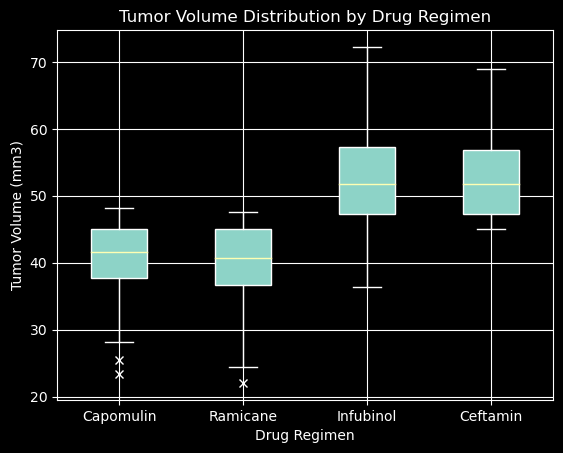

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Patch arist let's me use them all as the same things
plt.boxplot(tumor_volume_data, labels=treatments, sym='x', patch_artist=True)

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution by Drug Regimen")
plt.grid(True)
plt.show()

## Line and Scatter Plots

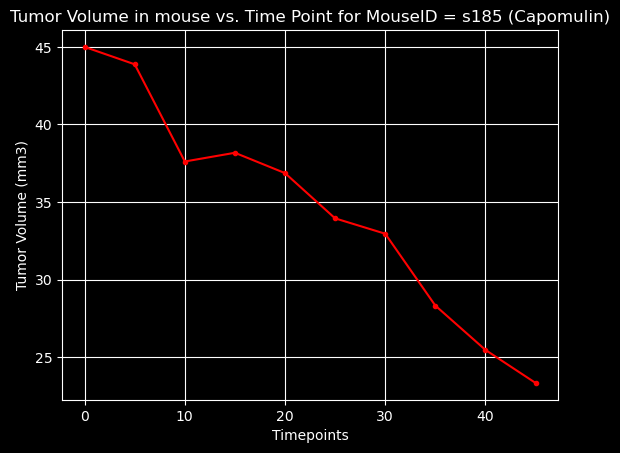

In [16]:
# Filter the DataFrame to include only mice treated with Capomulin
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Choose the first mouse ID from the filtered data
selected_mouse_id = capomulin_df["Mouse ID"].iloc[0]

# Filter the data for the selected mouse
selected_mouse_data = capomulin_df[capomulin_df["Mouse ID"] == selected_mouse_id]

# Generate the line plot for tumor volume vs. time point for the selected mouse
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='.', linestyle='-', color='red')
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume in mouse vs. Time Point for MouseID = {selected_mouse_id} (Capomulin)")
plt.grid(True)
plt.show()

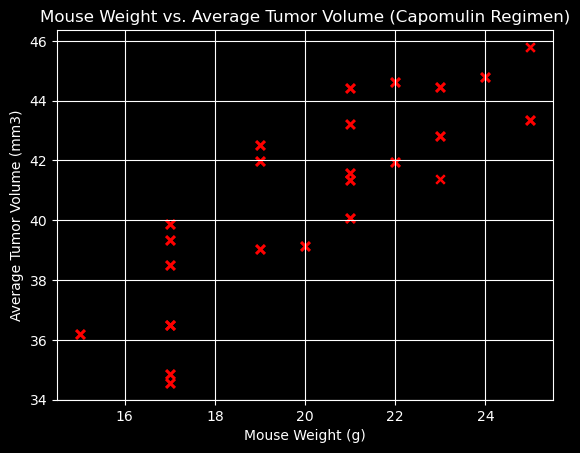

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the data by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the original DataFrame to include mouse weights
merged_df = pd.merge(capomulin_df, average_tumor_volume, on="Mouse ID", suffixes=("_weight", "_avg_tumor_volume"))

# Generate the scatter plot for mouse weight vs. average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg_tumor_volume"], color='red', marker='x')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.grid(True)
plt.show()

## Correlation and Regression

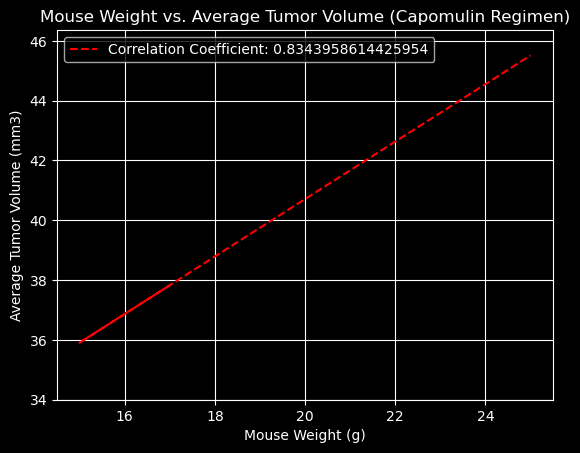

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Import scipy.stats for linregress
from scipy.stats import pearsonr, linregress

# Group the data by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the original DataFrame to include mouse weights
merged_df = pd.merge(capomulin_df, average_tumor_volume, on="Mouse ID", suffixes=("_weight", "_avg_tumor_volume"))

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, _ = pearsonr(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg_tumor_volume"])

# Make a string from the correlation coefficient so that it can be in the plot legend
str_c_coef = "Correlation Coefficient: "+ str(correlation_coefficient)

# Perform linear regression for mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg_tumor_volume"])

# Generate the scatter plot for mouse weight vs. average observed tumor volume with the regression line
plt.scatter(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg_tumor_volume"], color='k', marker='x')
plt.plot(merged_df["Weight (g)"], slope * merged_df["Weight (g)"] + intercept, color='r', linestyle='dashed', label=str_c_coef)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.legend()
plt.grid(True)
plt.show()